<a href="https://colab.research.google.com/github/priyanka9-99/Stroke-Prediction/blob/main/Stroke_Prediction_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

from sklearn import svm
from sklearn.svm import SVC

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
stroke = pd.read_csv(r'/content/archive (3).zip')
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
stroke.shape

(5110, 12)

In [ ]:
stroke['smoking_status'].replace("Unknown",np.nan,inplace = True)

In [ ]:
stroke.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [ ]:
stroke['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<Axes: >

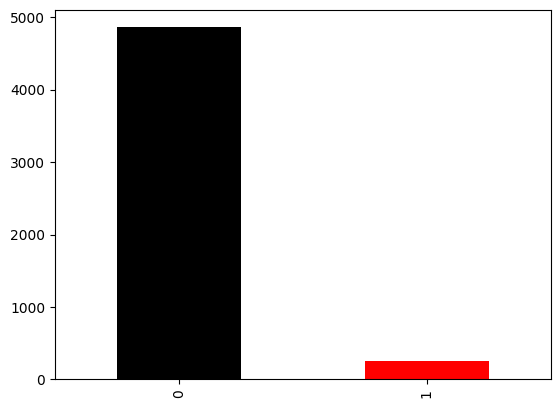

In [ ]:
stroke["stroke"].value_counts().plot.bar(color=["black","red"])


<Axes: >

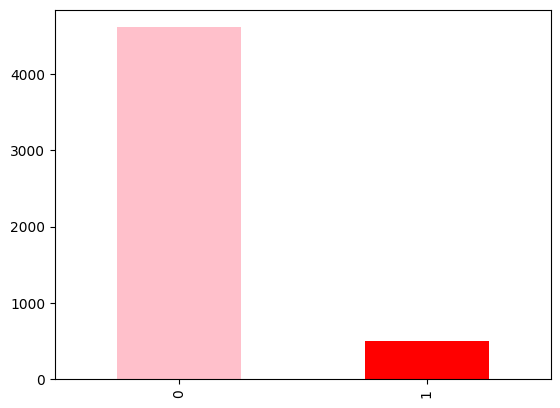

In [ ]:
stroke["hypertension"].value_counts().plot.bar(color=["pink","red"])

In [ ]:
stroke_pos = stroke[stroke['stroke'] ==1]
# dataframe with stroke value positive
stroke_pos

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,NaN,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,NaN,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,NaN,1


In [ ]:
stroke_pos.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  40
smoking_status       47
stroke                0
dtype: int64

In [ ]:
#dataframe with stroke value negative
stroke_neg = stroke[stroke['stroke'] == 0]
stroke_neg

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
stroke_neg.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   161
smoking_status       1497
stroke                  0
dtype: int64

In [ ]:
# Creating a dataframe having both bmi and smoking status null at the same time
test_df  = stroke[stroke['smoking_status'].isnull() & stroke['bmi'].isnull()]
test_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
13,8213,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,NaN,1
19,25226,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,NaN,1
27,61843,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,NaN,1
46,37937,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4202,23194,Male,32.00,1,0,No,Private,Rural,74.43,NaN,NaN,0
4286,23339,Male,3.00,0,0,No,children,Rural,194.75,NaN,NaN,0
4616,5774,Male,59.00,0,0,Yes,Private,Urban,223.16,NaN,NaN,0
4713,2044,Female,70.00,0,1,Yes,Self-employed,Rural,65.68,NaN,NaN,0


In [ ]:
# Dataframe having stroke value positive and both bmi and smoking status null
stroke_pos_null =  stroke_pos[stroke_pos['smoking_status'].isnull() & stroke_pos['bmi'].isnull()]
stroke_pos_null

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
13,8213,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,NaN,1
19,25226,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,NaN,1
27,61843,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,NaN,1
46,37937,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,NaN,1
50,18587,Female,76.00,0,0,No,Private,Urban,89.96,NaN,NaN,1
64,7356,Male,75.00,0,0,Yes,Private,Urban,104.72,NaN,NaN,1
81,26015,Female,66.00,0,0,Yes,Self-employed,Urban,101.45,NaN,NaN,1
84,70042,Male,58.00,0,0,Yes,Private,Urban,71.20,NaN,NaN,1
124,14164,Female,72.00,0,0,Yes,Private,Urban,219.91,NaN,NaN,1


In [ ]:
len(stroke_pos_null)

18

In [ ]:
# Dataframe having stroke value negative and both bmi and smoking status null
stroke_neg_null = stroke_neg[stroke_neg['smoking_status'].isnull() & stroke_neg['bmi'].isnull()]
stroke_neg_null

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
477,22470,Male,61.00,0,0,Yes,Govt_job,Urban,184.15,NaN,NaN,0
742,33723,Female,9.00,0,0,No,children,Urban,95.81,NaN,NaN,0
1115,809,Male,13.00,0,0,No,children,Urban,71.73,NaN,NaN,0
1183,13602,Male,73.00,1,0,Yes,Self-employed,Rural,102.06,NaN,NaN,0
1194,542,Female,3.00,0,0,No,children,Urban,79.63,NaN,NaN,0
1277,33187,Female,6.00,0,0,No,children,Urban,201.25,NaN,NaN,0
1300,37327,Female,71.00,0,0,Yes,Private,Urban,214.77,NaN,NaN,0
1324,132,Female,80.00,0,0,Yes,Govt_job,Urban,84.86,NaN,NaN,0
1471,937,Male,7.00,0,0,No,children,Urban,87.94,NaN,NaN,0
1596,16593,Male,47.00,0,0,No,Private,Rural,237.17,NaN,NaN,0


In [ ]:
stroke['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
# Creating the male data 
stroke_male = stroke[stroke['gender'] == 'Male']
stroke_male

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5097,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,NaN,0
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,NaN,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [ ]:
# Creating the female data
stroke_female = stroke[stroke['gender'] == 'Female']
stroke_female

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,NaN,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [ ]:
# Mean of BMI in females
stroke_female.bmi.mean()

29.065757680358992

In [ ]:
stroke_female['bmi'].fillna(stroke_female['bmi'].mean(),inplace=True)

<ipython-input-1269-de34640d18ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_female['bmi'].fillna(stroke_female['bmi'].mean(),inplace=True)


In [ ]:
stroke_female.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status       836
stroke                 0
dtype: int64

In [ ]:
stroke_male['bmi'].fillna(stroke_male['bmi'].mean(),inplace=True)

<ipython-input-1271-f7a8b75915a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_male['bmi'].fillna(stroke_male['bmi'].mean(),inplace=True)


In [ ]:
# Mean BMI in males
stroke_male.bmi.mean()

28.64793635007459

In [ ]:
stroke_male.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status       708
stroke                 0
dtype: int64

In [ ]:
stroke.drop('smoking_status',axis=1,inplace=True)
stroke


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,0


In [ ]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,0


In [ ]:
stroke['age'] = stroke['age'].astype(int)

In [ ]:
stroke.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object

In [ ]:
stroke['gender'].replace({"Male":"0","Female":"1","Other":"2"},inplace = True)

In [ ]:
stroke["gender"].unique()

array(['0', '1', '2'], dtype=object)

In [ ]:
stroke["gender"]=stroke["gender"].astype(int)

In [ ]:
stroke.dtypes

id                     int64
gender                 int64
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object

In [ ]:
stroke['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
stroke['ever_married'].replace({"No":"0","Yes":"1"},inplace = True)


In [ ]:
stroke["ever_married"]=stroke["ever_married"].astype(int)

In [ ]:
stroke.dtypes

id                     int64
gender                 int64
age                    int64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object

In [ ]:
stroke['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
stroke['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
stroke['Residence_type'].replace({"Urban":"0","Rural":"1"},inplace = True)


In [ ]:
stroke['work_type'].replace({"Private":"0","Self-employed":"1","Govt_job":"2","children":"3","Never_worked":"4"},inplace = True)


In [ ]:
stroke["Residence_type"]=stroke["Residence_type"].astype(int)

In [ ]:
stroke['work_type']=stroke['work_type'].astype(int)

In [ ]:
stroke.dtypes

id                     int64
gender                 int64
age                    int64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object

In [ ]:
stroke.drop(["id"],axis=1,inplace=True)
stroke.drop(["bmi"],axis=1,inplace=True)
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke
0,0,67,0,1,1,0,0,228.69,1
1,1,61,0,0,1,1,1,202.21,1
2,0,80,0,1,1,0,1,105.92,1
3,1,49,0,0,1,0,0,171.23,1
4,1,79,1,0,1,1,1,174.12,1
...,...,...,...,...,...,...,...,...,...
5105,1,80,1,0,1,0,0,83.75,0
5106,1,81,0,0,1,1,0,125.20,0
5107,1,35,0,0,1,1,1,82.99,0
5108,0,51,0,0,1,0,1,166.29,0


In [ ]:
stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
stroke               0
dtype: int64

<Axes: >

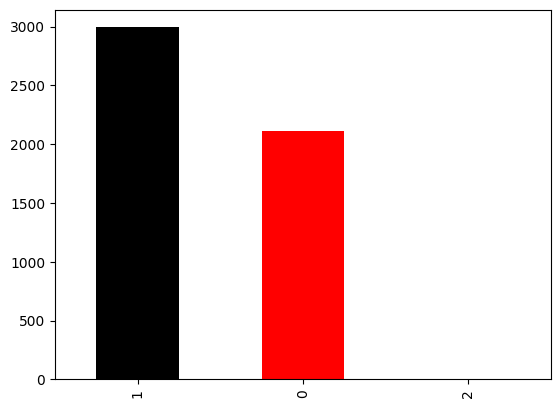

In [ ]:
stroke["gender"].value_counts().plot.bar(color=["black","red"])

<Axes: >

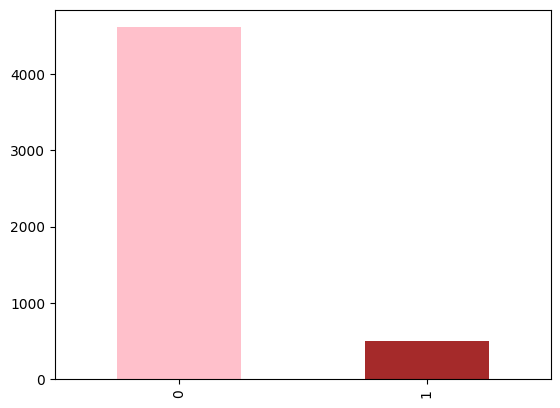

In [ ]:
stroke["hypertension"].value_counts().plot.bar(color=["pink","brown"])

<Axes: >

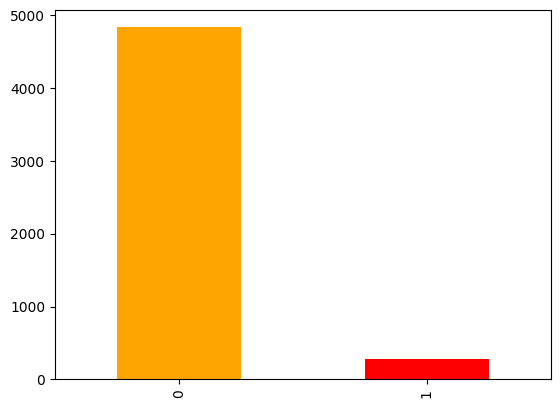

In [ ]:
stroke["heart_disease"].value_counts().plot.bar(color=["orange","red"])

<Axes: >

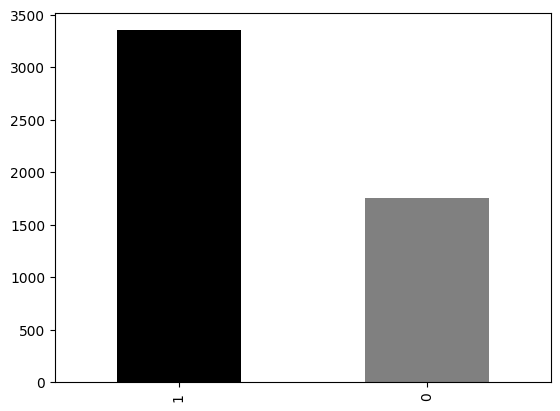

In [ ]:
stroke["ever_married"].value_counts().plot.bar(color=["black","grey"])

<Axes: >

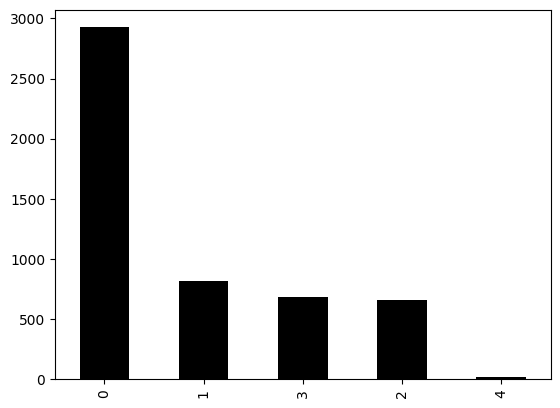

In [ ]:
stroke["work_type"].value_counts().plot.bar(cmap="bone")

<Axes: >

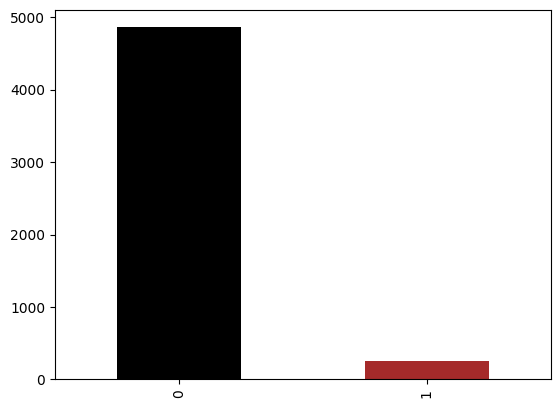

In [ ]:
stroke["stroke"].value_counts().plot.bar(color=["black","brown"])

<Axes: >

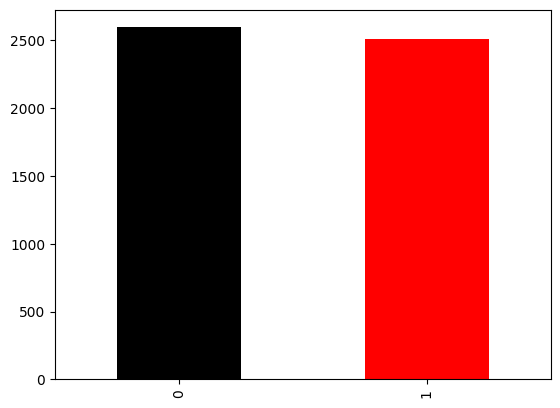

In [ ]:
stroke["Residence_type"].value_counts().plot.bar(color=["black","red"])

<Axes: xlabel='age', ylabel='Density'>

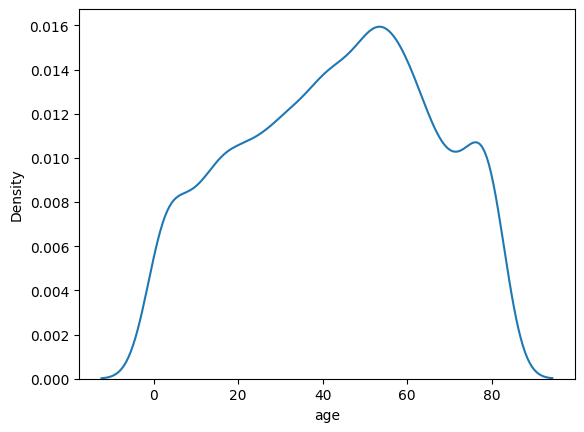

In [ ]:
sns.kdeplot(stroke["age"])

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

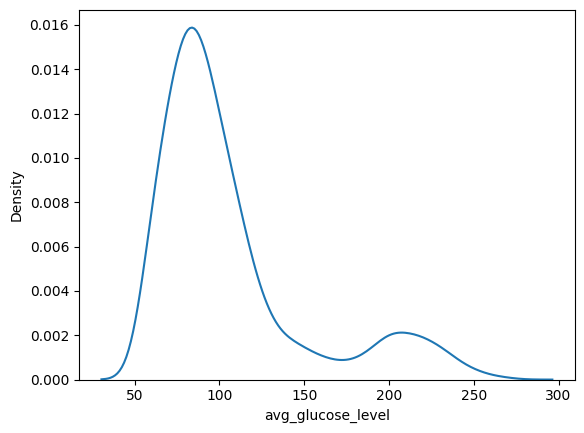

In [ ]:
sns.kdeplot(stroke["avg_glucose_level"])

<Axes: xlabel='gender'>

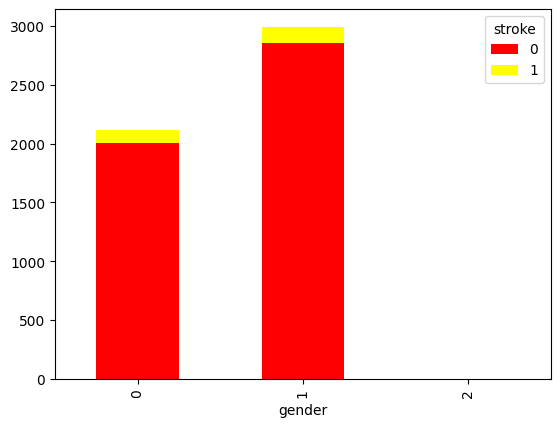

In [ ]:
stroke.groupby("gender")["stroke"].value_counts().unstack().plot(kind="bar",stacked=True,color=["red","yellow"])

<Axes: xlabel='hypertension'>

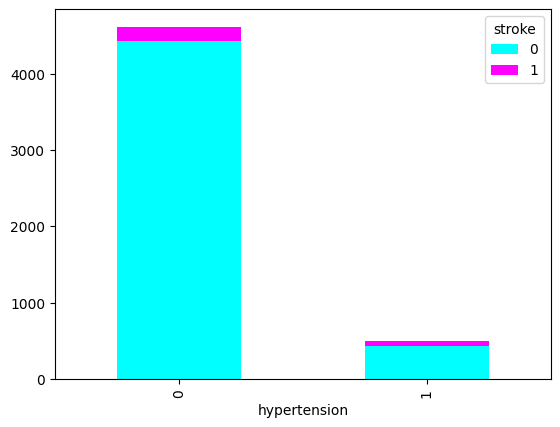

In [ ]:
stroke.groupby("hypertension")["stroke"].value_counts().unstack().plot(kind="bar",stacked=True,color=["cyan","magenta"])

<Axes: xlabel='heart_disease'>

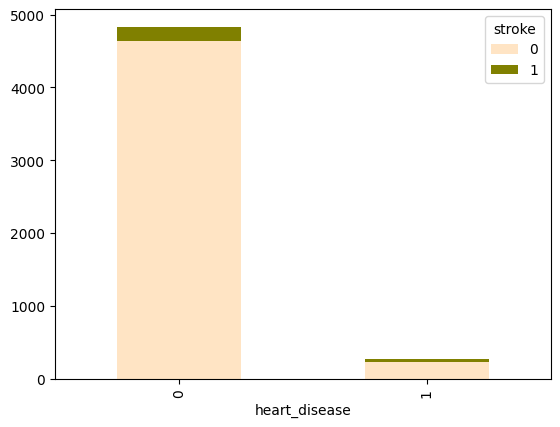

In [ ]:
stroke.groupby("heart_disease")["stroke"].value_counts().unstack().plot(kind="bar",stacked=True,color=["bisque","olive"])

<Axes: xlabel='ever_married'>

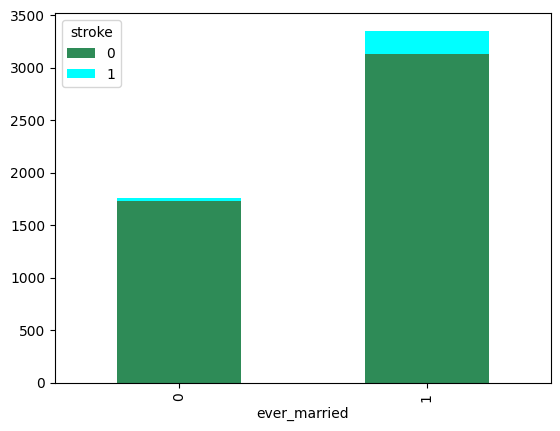

In [ ]:
stroke.groupby("ever_married")["stroke"].value_counts().unstack().plot(kind="bar",stacked=True,color=["seagreen","aqua"])

<Axes: xlabel='work_type'>

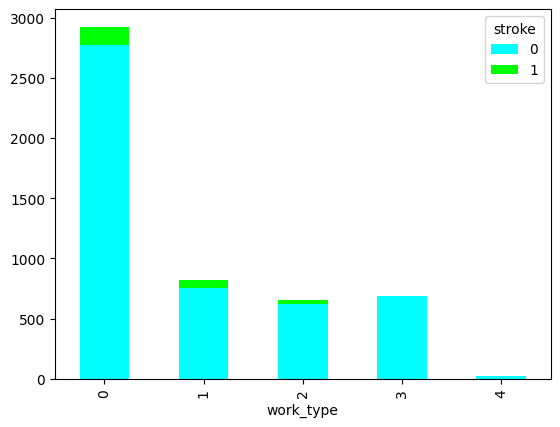

In [ ]:
stroke.groupby("work_type")["stroke"].value_counts().unstack().plot(kind="bar",stacked=True,color=["aqua","lime"])

<Axes: xlabel='Residence_type'>

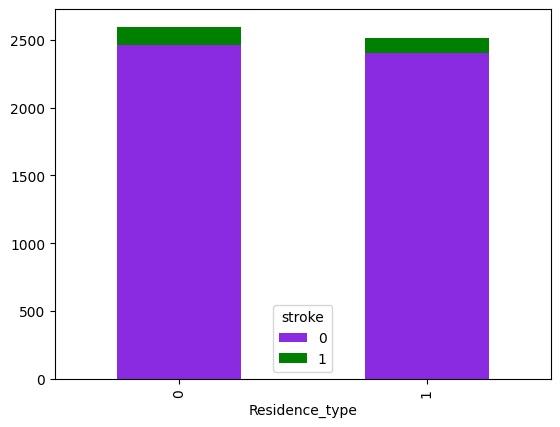

In [ ]:
stroke.groupby("Residence_type")["stroke"].value_counts().unstack().plot(kind="bar",stacked=True,color=["blueviolet","green"])

<Axes: xlabel='stroke'>

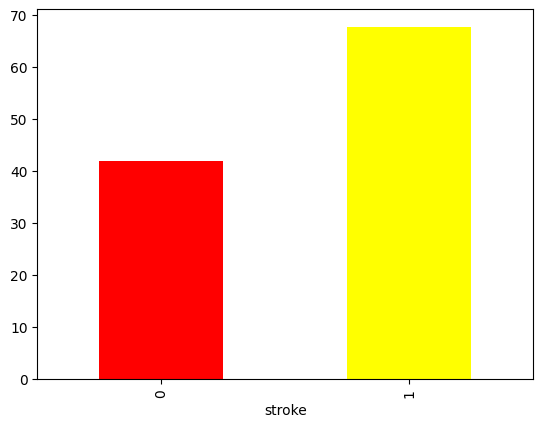

In [ ]:
stroke.groupby("stroke")["age"].mean().plot(kind="bar",color=["red","yellow"])

<Axes: xlabel='stroke'>

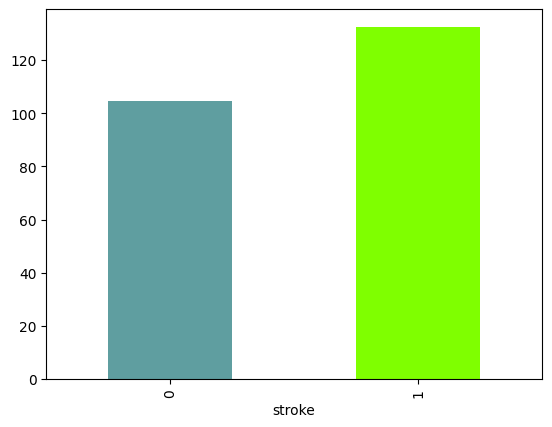

In [ ]:
stroke.groupby("stroke")["avg_glucose_level"].mean().plot(kind="bar",color=["cadetblue","chartreuse"])

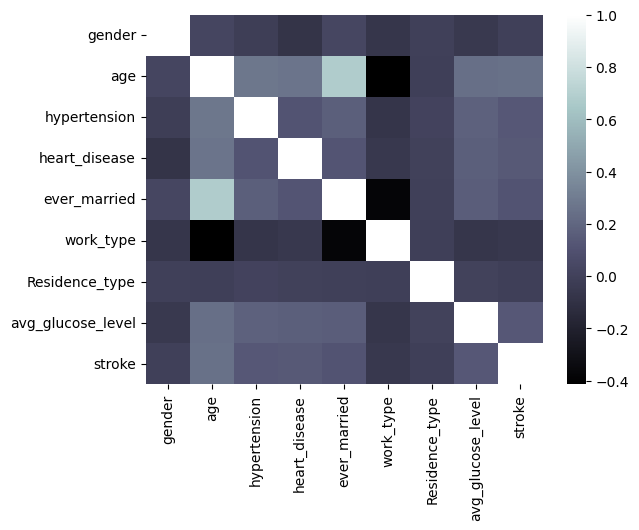

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
matrix = stroke.corr()
sns.heatmap(matrix,cmap="bone")
plt.show()

In [ ]:
stroke = stroke.values
stroke

array([[  0.  ,  67.  ,   0.  , ...,   0.  , 228.69,   1.  ],
       [  1.  ,  61.  ,   0.  , ...,   1.  , 202.21,   1.  ],
       [  0.  ,  80.  ,   0.  , ...,   1.  , 105.92,   1.  ],
       ...,
       [  1.  ,  35.  ,   0.  , ...,   1.  ,  82.99,   0.  ],
       [  0.  ,  51.  ,   0.  , ...,   1.  , 166.29,   0.  ],
       [  1.  ,  44.  ,   0.  , ...,   0.  ,  85.28,   0.  ]])

**MACHINE LEARNING**

In [ ]:
# import sklearn
# from sklearn import model_selection
# from sklearn.model_selection import train_test_split

In [ ]:
x=stroke[:,:8]
y=stroke[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,shuffle=True, random_state=42)
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

x_train :  (4088, 8)
y_train :  (4088,)
x_test :  (1022, 8)
y_test :  (1022,)


In [ ]:
# LOGISTIC REGRESSION

In [ ]:
# from sklearn import linear_model
# from sklearn.linear_model import LogisticRegression

# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction1=model.predict(x_test)
prediction1

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy1=(accuracy_score(y_test,prediction1))*100
print(accuracy1,"%")

93.9334637964775 %


In [ ]:
confusion_matrix(y_test,prediction1)

array([[960,   0],
       [ 62,   0]])

In [ ]:
classification_report(y_test,prediction1)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n         0.0       0.94      1.00      0.97       960\n         1.0       0.00      0.00      0.00        62\n\n    accuracy                           0.94      1022\n   macro avg       0.47      0.50      0.48      1022\nweighted avg       0.88      0.94      0.91      1022\n'

In [ ]:
#  SUPPORT VECTOR MACHINE

In [ ]:
# from sklearn import svm
# from sklearn.svm import SVC

# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

In [ ]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
prediction2=model.predict(x_test)
prediction2

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy2=(accuracy_score(y_test,prediction2))*100
print(accuracy2,"%")

93.9334637964775 %


In [ ]:
confusion_matrix(y_test,prediction2)

array([[960,   0],
       [ 62,   0]])

In [ ]:
## DECISION TREE CLASSIFIER

In [ ]:
# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier

# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
prediction3=model.predict(x_test)
prediction3

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy3=(accuracy_score(y_test,prediction3))*100
print(accuracy3,"%")

90.90019569471625 %


In [ ]:
## KNEIGHBOUR CLASSIFIER

In [ ]:
# from sklearn import neighbors
# from sklearn.neighbors import KNeighborsClassifier

# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
prediction4=model.predict(x_test)
prediction4

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy4=(accuracy_score(y_test,prediction4))*100
print(accuracy4,"%")

93.63992172211351 %


In [ ]:
## RADOMFORESTCLASSIFIER##

In [ ]:
# from sklearn import ensemble
# from sklearn.ensemble import RandomForestClassifier

# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
prediction5 = model.predict(x_test)
prediction5

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy5=(accuracy_score(y_test,prediction5))*100
print(accuracy5,"%")

93.83561643835617 %


In [ ]:
confusion5=confusion_matrix(y_test,prediction5)
print(confusion5)

[[957   3]
 [ 60   2]]


In [ ]:
classification5=classification_report(y_test,prediction5)
classification5

'              precision    recall  f1-score   support\n\n         0.0       0.94      1.00      0.97       960\n         1.0       0.40      0.03      0.06        62\n\n    accuracy                           0.94      1022\n   macro avg       0.67      0.51      0.51      1022\nweighted avg       0.91      0.94      0.91      1022\n'

In [ ]:
## NAIVE_BAYES

In [ ]:
# from sklearn import naive_bayes
# from sklearn.naive_bayes import GaussianNB

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)

prediction6=model.predict(x_test)
prediction6

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
accuracy6=(accuracy_score(y_test,prediction6))*100
print(accuracy6,"%")

86.88845401174167 %


In [ ]:
confusion6=confusion_matrix(y_test,prediction6)
print(confusion6)

[[859 101]
 [ 33  29]]


In [ ]:
classification6=classification_report(y_test,prediction6)
classification6

'              precision    recall  f1-score   support\n\n         0.0       0.96      0.89      0.93       960\n         1.0       0.22      0.47      0.30        62\n\n    accuracy                           0.87      1022\n   macro avg       0.59      0.68      0.61      1022\nweighted avg       0.92      0.87      0.89      1022\n'

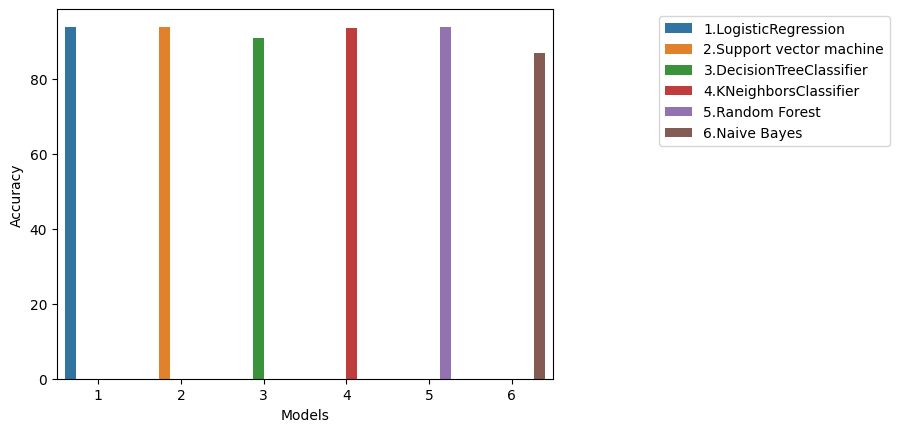

93.9334637964775


In [ ]:
Highest_accuracy=[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6]
num=[1,2,3,4,5,6]
Models=["1.LogisticRegression","2.Support vector machine","3.DecisionTreeClassifier","4.KNeighborsClassifier",
        "5.Random Forest","6.Naive Bayes"]
a=sns.barplot(x=num,y=Highest_accuracy,hue=Models)
a.set(xlabel="Models",ylabel="Accuracy")
a.legend(bbox_to_anchor= (1.2,1))
plt.show()
print(max(Highest_accuracy))